In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [2]:
architectures = ['BRC', 'GRU', 'Ladder', 'Laguerre', 'LMU', 'LSTM', 'nBRC']
#architectures = ['Laguerre']

for seed in range(1, 6):
    
    for architecture in architectures:
    
        test_set = pd.read_csv(f'{architecture}_x_test_{seed}.csv')
        predictions = pd.read_csv(f'{architecture}_predictions_{seed}.csv')

In [3]:
for architecture in architectures:
    
    df_arch = pd.DataFrame(columns = range(1, 6))
    
    final_error_arch = []
    
    for seed in range(1, 6):
        
        #fig, axes = plt.subplots(figsize = (10, 6))
        
        error = pd.read_csv(f"{architecture}_error_{seed}.csv")
        
        df_arch[seed] = error['0'].values
        final_error_arch.append(df_arch[seed].values[-1])
        
    print(f'Architecture: {architecture}\nMin: {min(final_error_arch):.4f}\nMax: {max(final_error_arch):.4f}\nAvg: {statistics.mean(final_error_arch):.4f}')
    print(f'Std_dev: {np.std(final_error_arch):.4f}\n')
        
    df_arch.to_csv(f'{architecture}_error_all_seeds.csv')

Architecture: BRC
Min: 20.9762
Max: 26.2713
Avg: 23.1749
Std_dev: 1.8363

Architecture: GRU
Min: 0.0051
Max: 0.2363
Avg: 0.0613
Std_dev: 0.0890

Architecture: Ladder
Min: 0.0103
Max: 0.0150
Avg: 0.0116
Std_dev: 0.0018

Architecture: Laguerre
Min: 0.0101
Max: 0.0238
Avg: 0.0168
Std_dev: 0.0057

Architecture: LMU
Min: 0.1170
Max: 0.3385
Avg: 0.1914
Std_dev: 0.0817

Architecture: LSTM
Min: 0.0017
Max: 0.0183
Avg: 0.0076
Std_dev: 0.0060

Architecture: nBRC
Min: 1.2211
Max: 2.2975
Avg: 1.7015
Std_dev: 0.4043



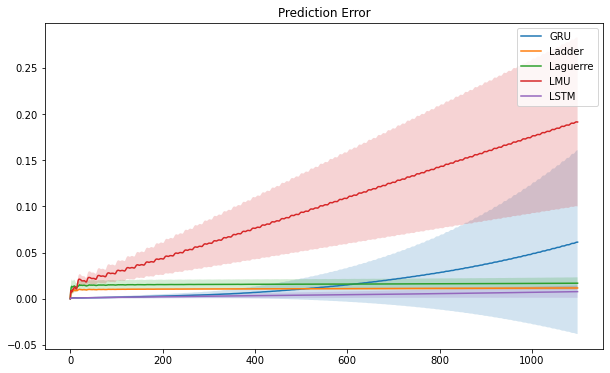

In [4]:
fig, axes = plt.subplots(figsize = (10, 6))

for architecture in architectures:
    
    if architecture in ['BRC', 'nBRC']:
        continue
    
    df_error = pd.read_csv(f'{architecture}_error_all_seeds.csv')
    
    df_error.drop('Unnamed: 0', axis = 1, inplace = True)
    
    #df_error.plot()
    
    df_error.mean(axis = 0)

    axes.plot(df_error.mean(axis = 1), label = f"{architecture}")
    axes.fill_between(x = range(df_error.index.start, df_error.index.stop),
                      y1 = df_error.mean(axis = 1) - df_error.std(axis = 1),
                      y2 = df_error.mean(axis = 1) + df_error.std(axis = 1), 
                      alpha = 0.2)
    
axes.set_title('Prediction Error');
axes.legend()

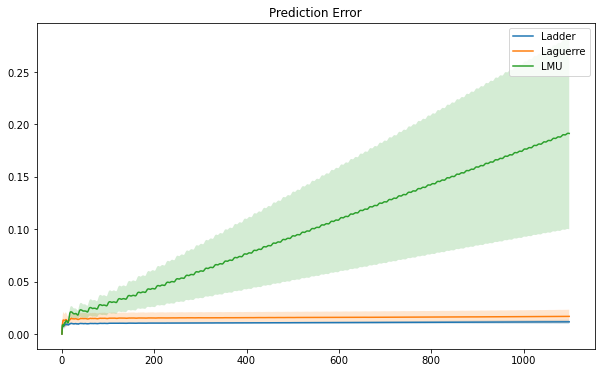

In [5]:
fig, axes = plt.subplots(figsize = (10, 6))

for architecture in architectures:
    
    if architecture in ['BRC', 'nBRC', 'LSTM', 'GRU']:
        continue
    
    df_error = pd.read_csv(f'{architecture}_error_all_seeds.csv')
    
    df_error.drop('Unnamed: 0', axis = 1, inplace = True)
    
    #df_error.plot()
    
    df_error.mean(axis = 0)

    axes.plot(df_error.mean(axis = 1), label = f"{architecture}")
    axes.fill_between(x = range(df_error.index.start, df_error.index.stop),
                      y1 = df_error.mean(axis = 1) - df_error.std(axis = 1),
                      y2 = df_error.mean(axis = 1) + df_error.std(axis = 1), 
                      alpha = 0.2)
    
axes.set_title('Prediction Error');
axes.legend()